In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Source Sans Pro']})
rc('text', usetex=True)

matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'

from package.helpers import test_physical_lens
from package.plots import plot

/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

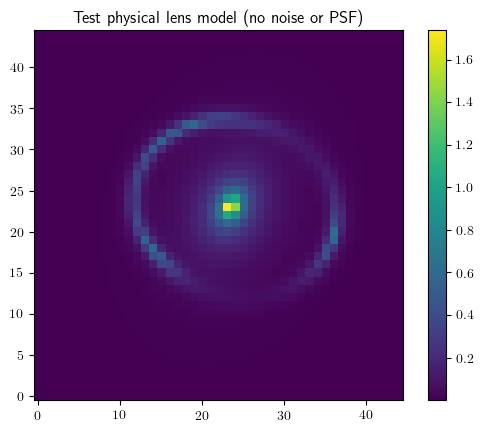

(45, 45)


In [4]:
physical_lens = test_physical_lens.TestPhysicalLens()
kwargs_psf_none = {'psf_type': 'NONE'}

test_model = physical_lens.get_array(num_pix=45, kwargs_psf=kwargs_psf_none)

plt.imshow(test_model)
plt.title('Test physical lens model (no noise or PSF)')
plt.colorbar()
plt.show()

print(test_model.shape)

Overplot source and lens

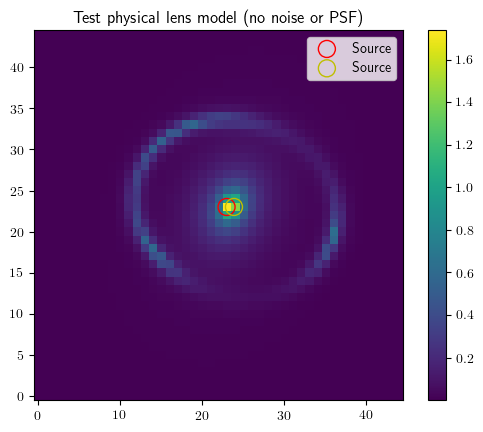

In [5]:
# get source pixel coordinates
source_x, source_y = physical_lens.get_source_pixel_coords()

# get lens pixel coordinates
lens_x, lens_y = physical_lens.get_lens_pixel_coords()

# overplot them
plt.scatter(source_x, source_y, edgecolor='r', facecolor='none', s=150, label='Source position')
plt.scatter(lens_x, lens_y, edgecolor='y', facecolor='none', s=150, label='Lens position')

plt.imshow(test_model)
plt.title('Test physical lens model (no noise or PSF)')
plt.legend()
plt.colorbar()
plt.show()

Overplot caustics and critical curve

0.1 0


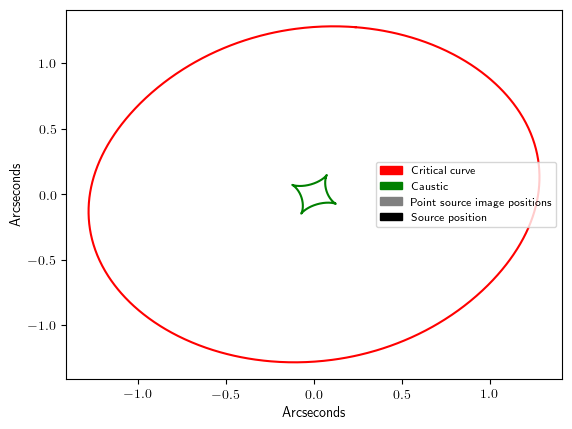

In [6]:
from lenstronomy.Plots import lens_plot
from lenstronomy.LensModel.Solver.lens_equation_solver import LensEquationSolver
from lenstronomy.SimulationAPI.sim_api import SimAPI
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman
import lenstronomy.Util.simulation_util as sim_util
from lenstronomy.Data.imaging_data import ImageData
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

# source plane coordinates of source
beta_ra, beta_dec = physical_lens.kwargs_source[0]['center_x'], physical_lens.kwargs_source[0]['center_y']
print(beta_ra, beta_dec)

# specify the lens model class to deal with
solver = LensEquationSolver(physical_lens.lens_model_class)

# convert from physical to lensing units
lenstronomy_roman_config = Roman(band='F106', psf_type='PIXEL', survey_mode='wide_area').kwargs_single_band()
sim_g = SimAPI(numpix=45, kwargs_single_band=lenstronomy_roman_config, kwargs_model=physical_lens.kwargs_model)
kwargs_lens_lensing_units = sim_g.physical2lensing_conversion(kwargs_mass=physical_lens.kwargs_lens)

# solve for image positions provided a lens model and the source position
theta_ra, theta_dec = solver.image_position_from_source(beta_ra, beta_dec, kwargs_lens_lensing_units)

numPix=500
deltaPix=0.01
sourcePos_x=0
sourcePos_y=0
point_source=False
with_caustics=False
with_convergence=True
coord_center_ra=0
coord_center_dec=0
coord_inverse=False
fast_caustic=True

kwargs_data = sim_util.data_configure_simple(
        numPix,
        deltaPix,
        center_ra=coord_center_ra,
        center_dec=coord_center_dec,
        inverse=coord_inverse,
    )
data = ImageData(**kwargs_data)
_coords = data

# plot
f, axes = plt.subplots()
# lens_plot.lens_model_plot(axes, lensModel=physical_lens.lens_model_class, kwargs_lens=kwargs_lens_lensing_units, sourcePos_x=beta_ra, sourcePos_y=beta_dec, point_source=True, with_caustics=True, fast_caustic=True, coord_inverse=True)
# axes.set_title('Mass model of ' + dataset.get('target_name'))
lens_plot.caustics_plot(ax=axes, pixel_grid=_coords, lens_model=physical_lens.lens_model_class, kwargs_lens=kwargs_lens_lensing_units, fast_caustic=fast_caustic, coord_inverse=coord_inverse, color_crit='r', color_caustic='g')
# axes.imshow(test_model)

axes.set_xlabel('Arcseconds')
axes.set_ylabel('Arcseconds')
red_patch = mpatches.Patch(color='r', label='Critical curve')
blue_patch = mpatches.Patch(color='g', label='Caustic')
grey_patch = mpatches.Patch(color='grey', label='Point source image positions')
black_patch = mpatches.Patch(color='black', label='Source position')
axes.legend(loc=0, prop={'size': 8}, handles=[red_patch, blue_patch, grey_patch, black_patch])
axes.xaxis.set_ticks_position("bottom")
f.show()